# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
# taken from Day079 example code
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
# adapted from Day079 example code
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95 # for SGD
RHO = 0.9 # for RMSprop

In [7]:
results = {}

# adapted from Day079 example code
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    #optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    optimizer = keras.optimizers.RMSprop(learning_rate=lr, rho=RHO)
    #optimizer = keras.optimizers.Adagrad(learning_rate=lr)
    #optimizer = keras.optimizers.Adam(learning_rate=lr)    
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 5s 106us/step - loss: 2.3078 - accuracy: 0.1006 - val_loss: 2.3219 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.3082 - accuracy: 0.0990 - val_loss: 2.3115 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 5s 106us/step - loss: 2.3080 - accuracy: 0.0993 - val_loss: 2.3130 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________________

Epoch 46/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.7990 - accuracy: 0.3375 - val_loss: 1.8295 - val_accuracy: 0.3208
Epoch 47/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.7964 - accuracy: 0.3370 - val_loss: 1.8304 - val_accuracy: 0.3142
Epoch 48/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.7943 - accuracy: 0.3366 - val_loss: 1.8283 - val_accuracy: 0.3204
Epoch 49/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.7977 - accuracy: 0.3344 - val_loss: 1.8322 - val_accuracy: 0.3218
Epoch 50/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.7981 - accuracy: 0.3322 - val_loss: 1.8981 - val_accuracy: 0.3097
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________

Epoch 44/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.8291 - accuracy: 0.7005 - val_loss: 1.8283 - val_accuracy: 0.4992
Epoch 45/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.8179 - accuracy: 0.7082 - val_loss: 1.9290 - val_accuracy: 0.4759
Epoch 46/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.8049 - accuracy: 0.7085 - val_loss: 1.9290 - val_accuracy: 0.4796
Epoch 47/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.7918 - accuracy: 0.7153 - val_loss: 1.8876 - val_accuracy: 0.4986
Epoch 48/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.7804 - accuracy: 0.7186 - val_loss: 1.8736 - val_accuracy: 0.4927
Epoch 49/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.7718 - accuracy: 0.7200 - val_loss: 1.9821 - val_accuracy: 0.4902
Epoch 50/50
50000/50000 [==============================] - 6s 111us/step - loss: 0.7589 - accuracy: 0.7271

Epoch 42/50
50000/50000 [==============================] - 6s 113us/step - loss: 1.0162 - accuracy: 0.6484 - val_loss: 1.3088 - val_accuracy: 0.5470
Epoch 43/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.0070 - accuracy: 0.6511 - val_loss: 1.3946 - val_accuracy: 0.5230
Epoch 44/50
50000/50000 [==============================] - 6s 110us/step - loss: 1.0005 - accuracy: 0.6537 - val_loss: 1.3542 - val_accuracy: 0.5271
Epoch 45/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.9902 - accuracy: 0.6538 - val_loss: 1.3810 - val_accuracy: 0.5213
Epoch 46/50
50000/50000 [==============================] - 6s 116us/step - loss: 0.9775 - accuracy: 0.6606 - val_loss: 1.3795 - val_accuracy: 0.5195
Epoch 47/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.9660 - accuracy: 0.6649 - val_loss: 1.3847 - val_accuracy: 0.5221
Epoch 48/50
50000/50000 [==============================] - 6s 115us/step - loss: 0.9597 - accuracy: 0.6664

Epoch 40/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.4627 - accuracy: 0.4915 - val_loss: 1.4984 - val_accuracy: 0.4723
Epoch 41/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.4572 - accuracy: 0.4941 - val_loss: 1.5005 - val_accuracy: 0.4701
Epoch 42/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.4525 - accuracy: 0.4941 - val_loss: 1.4931 - val_accuracy: 0.4703
Epoch 43/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.4480 - accuracy: 0.4965 - val_loss: 1.4864 - val_accuracy: 0.4789
Epoch 44/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.4434 - accuracy: 0.4993 - val_loss: 1.5011 - val_accuracy: 0.4646
Epoch 45/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.4395 - accuracy: 0.4993 - val_loss: 1.4864 - val_accuracy: 0.4720
Epoch 46/50
50000/50000 [==============================] - 5s 109us/step - loss: 1.4344 - accuracy: 0.5023

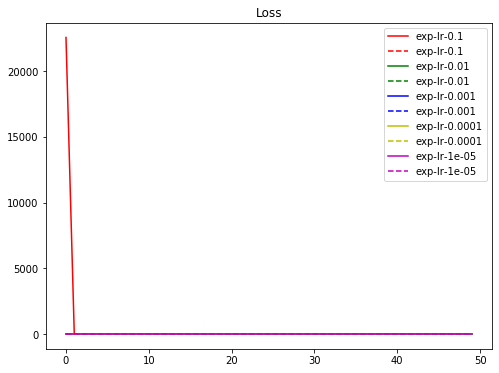

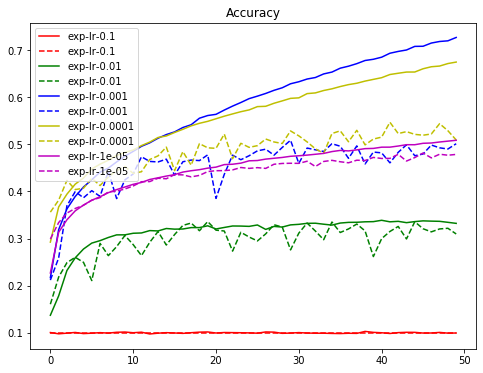

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()